In [1]:
print("OK")

OK


In [4]:
import pandas as pd
df = pd.read_csv("ETH_1h.csv")
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [10]:
df['Formated date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d %I-%p')
df

,Date,Symbol,Open,High,Low,Close,Volume,Formated date
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,2020-03-13 20:00:00
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,2020-03-13 19:00:00
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,2020-03-13 18:00:00
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,2020-03-13 17:00:00
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,2020-03-13 16:00:00
...,...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,2017-07-01 15:00:00
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,2017-07-01 14:00:00
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,2017-07-01 13:00:00
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87,2017-07-01 12:00:00


In [13]:
df.loc[0,'Formated date']

Timestamp('2020-03-13 20:00:00')

In [14]:
df.loc[0,'Formated date'].day_name()

'Friday'

In [23]:
# read data using parsar
my_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
df_p= pd.read_csv("ETH_1h.csv", parse_dates = ['Date'],date_parser = my_parser)

<ipython-input-23-4b4166dde658>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  my_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')


In [24]:
df_p

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [26]:
df_p['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [27]:
df_p['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [28]:
df_p['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [29]:
df_p['Date'].max() - df_p['Date'].min()

Timedelta('986 days 09:00:00')

In [32]:
filt = (df_p['Date']>='2020')
df_p.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40


In [35]:
filt = (df_p['Date']>='2019') & (df_p['Date']<'2020')
df_p.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84
...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99


In [41]:
filt= (df_p['Date']>= pd.to_datetime('2019-01-01')) & (df_p['Date']< pd.to_datetime('2019-01-02'))
df_p.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume
10485,2019-01-01 23:00:00,ETHUSD,137.98,140.90,137.20,139.75,2267514.08
10486,2019-01-01 22:00:00,ETHUSD,137.71,138.24,136.66,137.98,840857.18
10487,2019-01-01 21:00:00,ETHUSD,138.21,138.79,137.68,137.71,1156494.44
10488,2019-01-01 20:00:00,ETHUSD,136.00,140.45,135.83,138.21,3326711.79
10489,2019-01-01 19:00:00,ETHUSD,132.34,136.18,132.34,136.00,1043670.71
10490,2019-01-01 18:00:00,ETHUSD,133.10,133.10,131.49,132.34,1382653.37
10491,2019-01-01 17:00:00,ETHUSD,133.36,133.75,133.04,133.10,511163.36
10492,2019-01-01 16:00:00,ETHUSD,133.06,133.50,132.80,133.36,543086.42
10493,2019-01-01 15:00:00,ETHUSD,133.81,133.81,132.80,133.06,540296.67
10494,2019-01-01 14:00:00,ETHUSD,134.65,134.65,133.80,133.81,806604.71


In [42]:
df_p.loc[filt].shape

(24, 7)

In [43]:
df.set_index('Formated date', inplace= True)
df

,Date,Symbol,Open,High,Low,Close,Volume
Formated date,,,,,,,
2020-03-13 20:00:00,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 17:00:00,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 16:00:00,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
2017-07-01 14:00:00,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
2017-07-01 13:00:00,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99


In [45]:
df['2020']

,Date,Symbol,Open,High,Low,Close,Volume
Formated date,,,,,,,
2020-03-13 20:00:00,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 17:00:00,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 16:00:00,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,2020-01-01 04-AM,ETHUSD,129.57,130.00,129.50,129.56,702786.82
2020-01-01 03:00:00,2020-01-01 03-AM,ETHUSD,130.37,130.44,129.38,129.57,496704.23
2020-01-01 02:00:00,2020-01-01 02-AM,ETHUSD,130.14,130.50,129.91,130.37,396315.72


In [47]:
df['2020-01-01' : '2020-01-02'].shape

(48, 7)

In [48]:
df['2020-01-01' : '2020-01-02']['Close']

Formated date
2020-01-02 23:00:00    126.81
2020-01-02 22:00:00    127.01
2020-01-02 21:00:00    127.39
2020-01-02 20:00:00    126.82
2020-01-02 19:00:00    127.25
2020-01-02 18:00:00    127.12
2020-01-02 17:00:00    126.91
2020-01-02 16:00:00    127.22
2020-01-02 15:00:00    129.26
2020-01-02 14:00:00    129.03
2020-01-02 13:00:00    128.97
2020-01-02 12:00:00    129.49
2020-01-02 11:00:00    129.16
2020-01-02 10:00:00    129.39
2020-01-02 09:00:00    129.46
2020-01-02 08:00:00    129.68
2020-01-02 07:00:00    128.65
2020-01-02 06:00:00    128.78
2020-01-02 05:00:00    129.08
2020-01-02 04:00:00    129.12
2020-01-02 03:00:00    128.56
2020-01-02 02:00:00    129.21
2020-01-02 01:00:00    129.76
2020-01-02 00:00:00    130.00
2020-01-01 23:00:00    130.19
2020-01-01 22:00:00    129.77
2020-01-01 21:00:00    131.41
2020-01-01 20:00:00    131.73
2020-01-01 19:00:00    131.34
2020-01-01 18:00:00    131.64
2020-01-01 17:00:00    131.97
2020-01-01 16:00:00    132.55
2020-01-01 15:00:00    131

In [49]:
df['2020-01-01'].mean()

Open         130.558750
High         131.011250
Low          130.177500
Close        130.627500
Volume    312845.139583
dtype: float64

In [55]:
df['2020-01-01'].head(24)

,Date,Symbol,Open,High,Low,Close,Volume
Formated date,,,,,,,
2020-01-01 23:00:00,2020-01-01 11-PM,ETHUSD,129.77,130.27,129.24,130.19,215362.64
2020-01-01 22:00:00,2020-01-01 10-PM,ETHUSD,131.41,131.41,129.36,129.77,411940.73
2020-01-01 21:00:00,2020-01-01 09-PM,ETHUSD,131.73,131.99,130.97,131.41,1168999.08
2020-01-01 20:00:00,2020-01-01 08-PM,ETHUSD,131.34,131.87,131.23,131.73,162346.84
2020-01-01 19:00:00,2020-01-01 07-PM,ETHUSD,131.64,131.72,131.15,131.34,167992.84
2020-01-01 18:00:00,2020-01-01 06-PM,ETHUSD,131.97,132.14,131.24,131.64,266693.21
2020-01-01 17:00:00,2020-01-01 05-PM,ETHUSD,132.55,132.68,131.94,131.97,244271.72
2020-01-01 16:00:00,2020-01-01 04-PM,ETHUSD,131.75,132.56,131.51,132.55,270425.94
2020-01-01 15:00:00,2020-01-01 03-PM,ETHUSD,131.66,132.15,131.29,131.75,168230.71


In [56]:
df['2020-01-01'].mean()

Open         130.558750
High         131.011250
Low          130.177500
Close        130.627500
Volume    312845.139583
dtype: float64

In [58]:
df['2020-01-01']['High'].mean()

131.01125

In [59]:
df['2020-01-01']['High'].max()

132.68

In [61]:
df['2020-03-13']['High'].max()

148.0

In [60]:
df['High'].resample('D').max()

Formated date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

In [62]:
df['High'].resample('D').max()["2020-03-13"]

148.0

In [64]:
highs_df= df['High'].resample('D').max()

In [66]:
highs_df["2020-03-13"]

148.0

<AxesSubplot:xlabel='Formated date'>

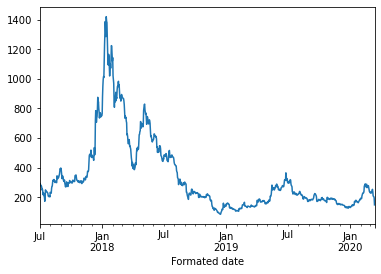

In [67]:
%matplotlib inline
highs_df.plot()

In [68]:
df.resample('W').agg({ 'Close':'mean','High':'max', 'Low':'min', 'Volume':'sum'})

,Close,High,Low,Volume
Formated date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08


In [74]:
df_resample = df.resample('W').agg({ 'Close':'mean','High':'max', 'Low':'min', 'Volume':'sum'})

In [80]:
df_resample.loc['2020-03-15']

Close     1.763328e+04
High      2.086500e+04
Low       9.000000e+03
Volume    4.983998e+10
Name: 2020-03-15 00:00:00, dtype: float64